# CREEDS
## Introduction
CREEDS stands for Clustered Replica Exchange Enveloping Distribution Sampling, it is a way to analyze large sets of compounds by clustering them and preparing them for REEDS simulations. The code is inspired by Hi-Map developed by Mary Pitman et. al., developed for pairwise free energy calculations. CREEDS expands this idea by incorporating for utiltities and clustering algorithms. Those functionalities are particular useful for REEDS simulations. This jupyter notebook intends to explain the main functions and mechanisms of CREEDS. Note that the codebase of CREEDS is not finished. We intend to expand, clean up and document this project further. So this jupyter notebook might not cover all aspects of CREEDS.

## Installing CREEDS
We provide an `environment.yml` file to conveniently create a dedicated python environment for CREEDS. Ensure to install mamba. This can be verfied by typing

``` bash
mamba --version
```

into a terminal. If you see no error, mamba is installed. Otherwise, you might need to install mamba. Please refer to the [official installation documentation](https://mamba.readthedocs.io/en/latest/installation/mamba-installation.html). 

Afterwards you can install the dedicated CREEDS environment by navigating to the code repository and entering

``` bash
mamba env create -n creeds --file environment.yml
mamba activate creeds
```

Now you should be able to run and use creeds. 

## Preparing Ligands
We currently support primarily Structures Data File (SDFiles). Enter those into the input folder as a separate folder (for your convenience). If they are grouped into a single sdf file, we provide you with an `split_sdf.py` script to dissect each molecule out of the file. You can use it the following way:

``` bash
python creeds/split_sdf.py input/<your-sdf-file-to-be-split> -n 1
```

Now you should have each compound in a separate file. *Make sure to delete the original file, so that it is not clustered as well*.


## Clustering the ligands
Currently, it is most convenient to modify the main function of each python module. This is not the end product but has worked well for the beta tests. Open the `cluster_maker.py` file in your favourite IDE. Scroll down to the following code segment:

```python
if __name__ == "__main__":
```

There are already some examples used to generate some clusters. The results of these clusters have been reported in the bachelor thesis by Luca Conconi. First create a ClusterMaker object. The first input should denote, where the ligands are located. The second specifies if a precalculated matrix should be loaded (we will discuss how to save a distance matrix later). If this entry is True, we should disclose the location of the distance. Note that this file should be a numpy binary file. Next, we can choose the Method. Currently, only the MCSS ((Maximum Common Substructure Score) which is equivalent to the DBSCAN score) has been tested. The other method RDKit Shape method is not recommended to be used but it is implemented. The variable output\_file defines where the clusters should be stored. CREEDS outputs a json file, with the names of the ligands in each cluster as an array. As the calculation of those pairwise scores can be computationally expensive, we can parallelize the compuation by specifying how many cores we want to use by the variable parallel\_. Finally, specifiy the location, where plots should be stored. This is done for later reference. Note that CREEDS supoports the input of the entire input of the db_mol Class from LoMap. This can help to further adjust CREEDS to suit your needs. An example is given below:

```python
cmaker = ClusterMaker('/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c/sdf_files/',
                       loadMatrix_=False,
                       loadFile_="/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/distance_matrix.npy",
                       method_="MCSS",
                       output_file_="/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/cluster04_c_mst_noise.json",
                       parallel_=6,
                       plot_folder_='/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/plots/')
```

After the creation of the object, it will automatically calculate the distance matrix and stores them internally. We can save the distance matrix in the following manner:
```python
cmaker.saveDistanceMatrix("/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/distance_matrix.npy")
```

Next, we can save the ids of the ligands, by the following function call:
```python
cmaker.saveDistanceMatrix("/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/distance_matrix.npy")
```

The id list will be needed in the randomizer and visualization module.

Finally, we can create the clusters with the following function:

```python
cmaker.create_clsuters(algorithm="dbscan")
```

where algorithm may be "dbscan" or "spectral" refering to the two possible clustering algorithms currently implemented in CREEDS. Note that spectral needs to have a predefined number of clusters set at the beginning.

## Interactive Tutorial for CREEDS
### DBSCAN

In [9]:
from cluster_maker import ClusterMaker

#creating the Cmaker object
cmaker = ClusterMaker('/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c/sdf_files/',
                           loadMatrix_ = False,
                           loadFile_ = "/localhome/lconconi/CREEDS/creeds/output/test_dbscan/distance_matrix.npy",
                           method_ = "MCSS",
                           output_file_ = "/localhome/lconconi/CREEDS/creeds/output/test_dbscan/test_dbscan_clusters.json",
                           parallel_= 6,
                           plot_folder_ = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/plots/')

Calculating Similarity Matrix by using Maximum Common Substructure...



Finished calculation of Similarity Matrix.


In [10]:
# Saving the distance Matrix
cmaker.saveDistanceMatrix("/localhome/lconconi/CREEDS/creeds/output/test_dbscan/distance_matrix.npy")

In [11]:
# Saving the ID List of the ligands
cmaker.writeIdList("/localhome/lconconi/CREEDS/creeds/output/test_dbscan/test_dbscan_ids.json")


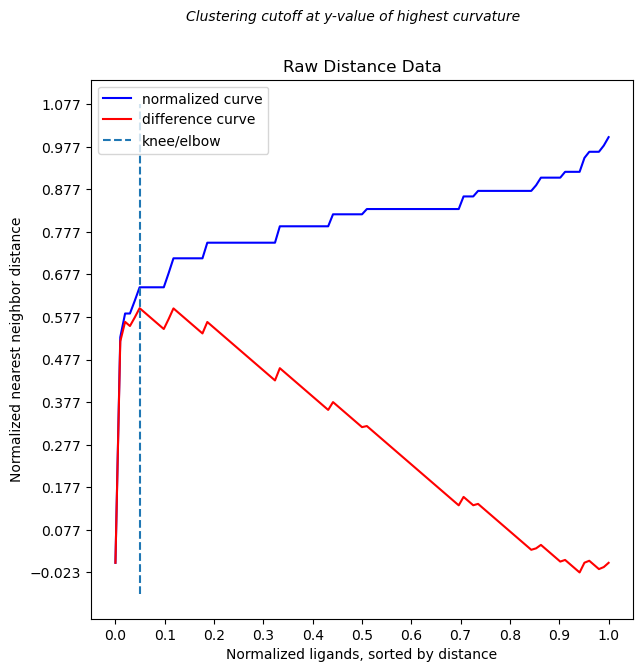

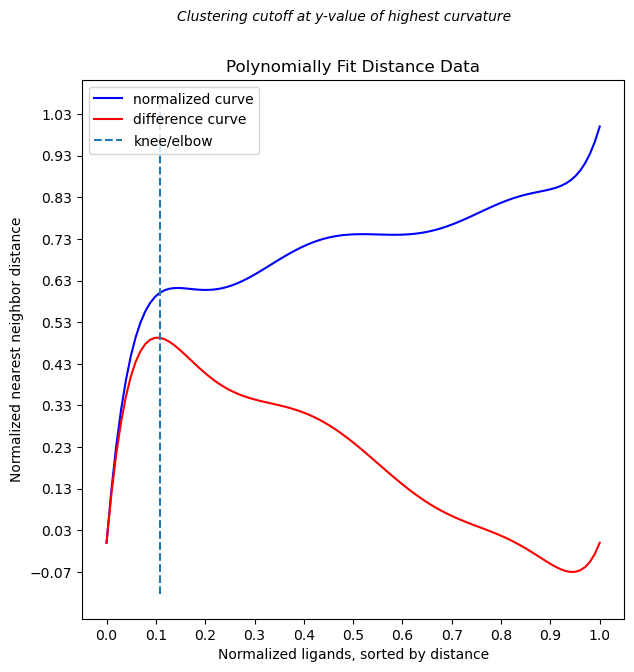

A suggested range for neighbor distances is between 0.362 and 0.33.
The computed, default cutoff is 0.33.
auto_cutoff was determined to be  0.33
Estimated number of clusters: 10
Estimated number of noise points: 27
losing %d ligands 27
The number of ligands is 103


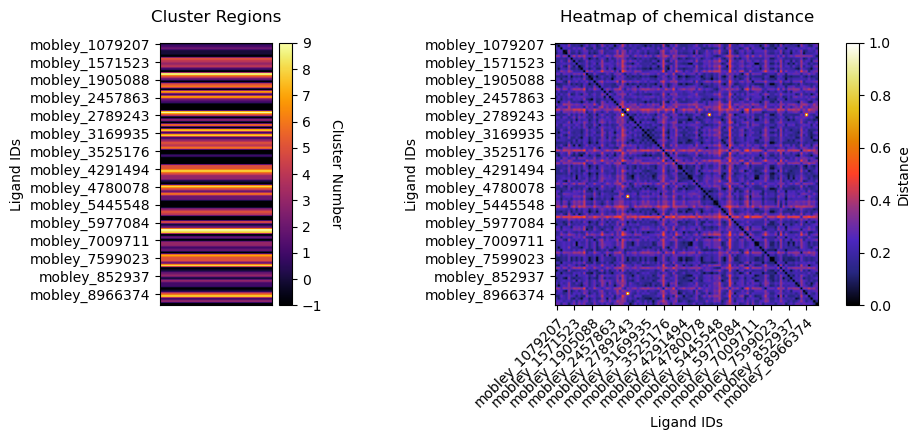

The number of ligands is 103
Wrote Clustering to  /localhome/lconconi/CREEDS/creeds/output/test_dbscan/test_dbscan_clusters.json  as json.


{'Cluster_0': ['mobley_1079207',
  'mobley_1363784',
  'mobley_1424265',
  'mobley_4584540',
  'mobley_6257907',
  'mobley_8057732',
  'mobley_8691603',
  'mobley_8861672'],
 'Cluster_1': ['mobley_1178614',
  'mobley_1760914',
  'mobley_2371092',
  'mobley_2489709',
  'mobley_3169935',
  'mobley_3187514',
  'mobley_4035953',
  'mobley_7200804',
  'mobley_8746821',
  'mobley_8789465',
  'mobley_9478823'],
 'Cluster_2': ['mobley_1189457',
  'mobley_1905088',
  'mobley_2484519',
  'mobley_4884177',
  'mobley_5220185',
  'mobley_5311804',
  'mobley_6303022',
  'mobley_6988468',
  'mobley_7295828',
  'mobley_7774695',
  'mobley_8127829'],
 'Cluster_3': ['mobley_1733799',
  'mobley_2925352',
  'mobley_3234716',
  'mobley_4494568',
  'mobley_4553008',
  'mobley_5518547',
  'mobley_7066554',
  'mobley_7150646',
  'mobley_852937',
  'mobley_8723116',
  'mobley_9507933'],
 'Cluster_4': ['mobley_1571523',
  'mobley_1755375',
  'mobley_3452749',
  'mobley_5571660'],
 'Cluster_5': ['mobley_1520842'

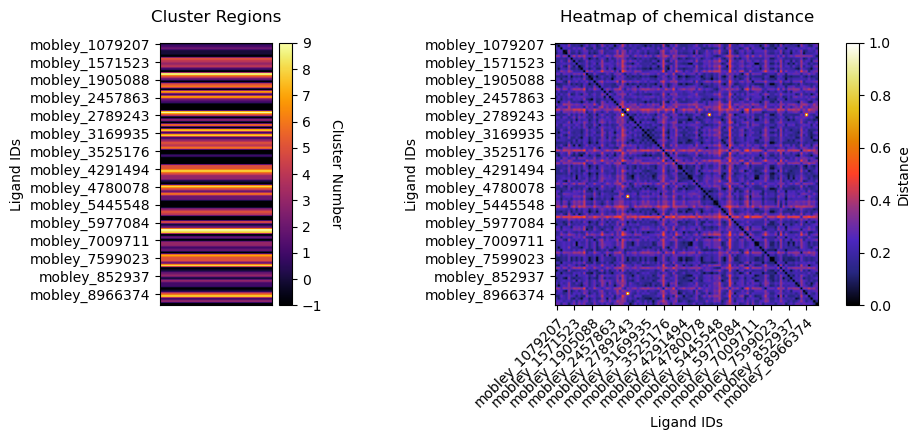

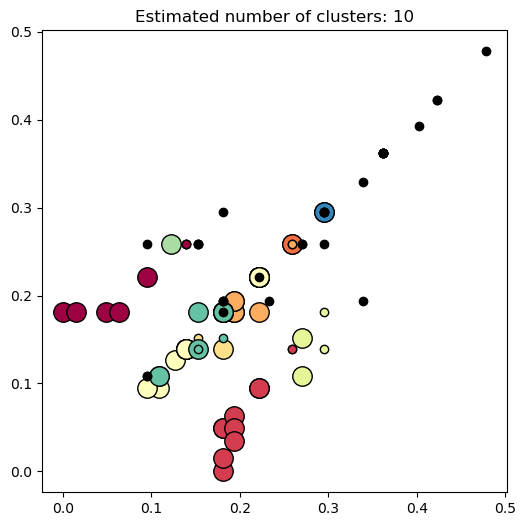

In [12]:
cmaker.create_clusters(algorithm="dbscan", interactive=True)

### Spectral

In [13]:
cmaker = ClusterMaker('/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c/sdf_files/',
                           loadMatrix_=False,
                           loadFile_="/localhome/lconconi/CREEDS/creeds/output/test_spectral/distance_matrix.npy",
                           method_="MCSS",
                           output_file_="/localhome/lconconi/CREEDS/creeds/output/test_spectral/test_output.json",
                           parallel_=6,
                           plot_folder_='/localhome/lconconi/CREEDS/creeds/output/test_spectral/plots/')


Calculating Similarity Matrix by using Maximum Common Substructure...



Finished calculation of Similarity Matrix.


In [14]:
cmaker.saveDistanceMatrix("/localhome/lconconi/CREEDS/creeds/output/test_spectral/distance_matrix.npy")

In [16]:
cmaker.writeIdList("/localhome/lconconi/CREEDS/creeds/output/test_spectral/test_spectral_id_list.json")

Total dispersion of first spectral clustering: 3.4727095066925915
Total dispersion of final spectral clustering: 3.4727095066925915
The number of ligands is 103


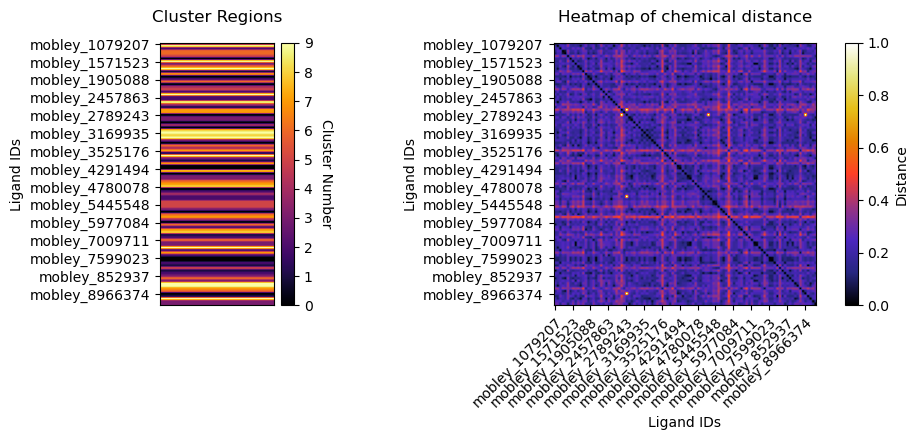

The number of ligands is 103
Wrote Clustering to  /localhome/lconconi/CREEDS/creeds/output/test_spectral/test_output.json  as json.


{'Cluster_0': ['mobley_1520842',
  'mobley_1873346',
  'mobley_20524',
  'mobley_2789243',
  'mobley_296847',
  'mobley_3053621',
  'mobley_3398536',
  'mobley_4287564',
  'mobley_4291494',
  'mobley_4483973',
  'mobley_4883284',
  'mobley_5520946',
  'mobley_5977084',
  'mobley_7599023',
  'mobley_7608462',
  'mobley_8966374'],
 'Cluster_1': ['mobley_1079207',
  'mobley_1855337',
  'mobley_2681549',
  'mobley_3980099',
  'mobley_4219614',
  'mobley_6804509',
  'mobley_7814642',
  'mobley_8057732',
  'mobley_9257453'],
 'Cluster_2': ['mobley_1189457',
  'mobley_1905088',
  'mobley_2354112',
  'mobley_2457863',
  'mobley_2484519',
  'mobley_4884177',
  'mobley_5220185',
  'mobley_5311804',
  'mobley_6303022',
  'mobley_6988468',
  'mobley_7295828',
  'mobley_755351',
  'mobley_7774695',
  'mobley_8127829'],
 'Cluster_3': ['mobley_1733799',
  'mobley_2923700',
  'mobley_2925352',
  'mobley_3234716',
  'mobley_4218209',
  'mobley_4494568',
  'mobley_4553008',
  'mobley_5518547',
  'mobley

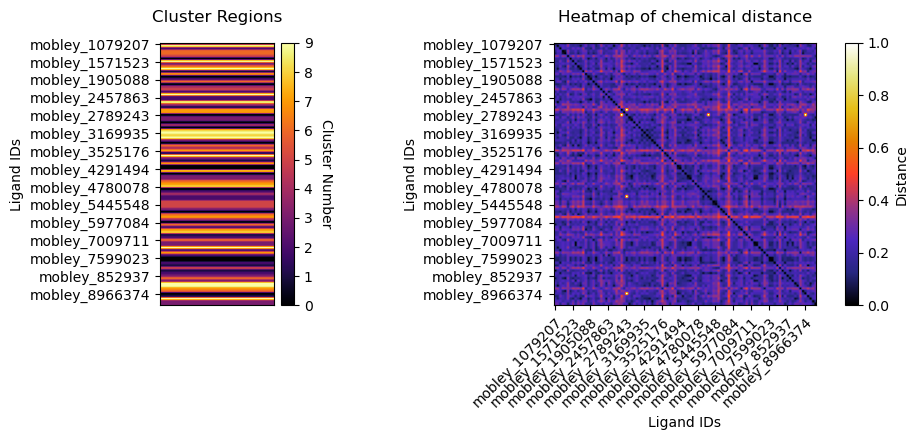

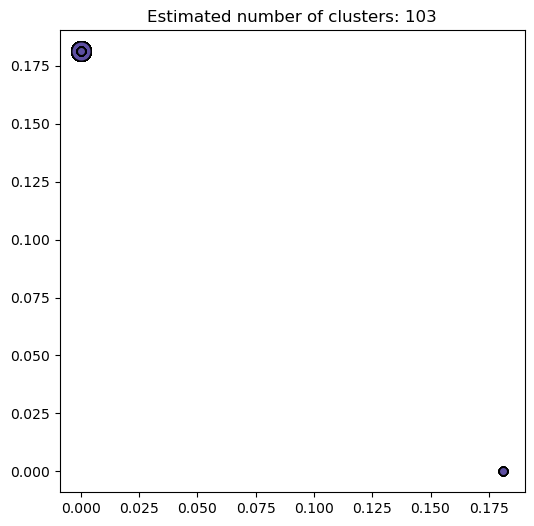

In [17]:
cmaker.create_clusters(algorithm="spectral", interactive=True, num_clusters=10)

## Preparing Simulations

### Unclustered Simulation
Now we want to prepare the clusters into sdf files that can be used to run REEDS simulations, for that purpose, we developed the randomizer module that can either take a basic set of ligands and do a randomized selection or a cluster based mechanism. 
For a fully randomized set use the following code

``` python
randomize(
    output_dir = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/unclustered/',
    sdf_files = '/localhome/lconconi/CREEDS/input/p38/',
    cluster_map_file = '/localhome/lconconi/CREEDS/creeds/output/p38/unclustered/ligand_list.json',
    cluster_name = "Cluster_0",
    max_num_Ligands = 30,
    max_num_Simulations= 4,
    returnSVG = True
)
```

where the output directory variable determines, where the sdf files should be stored, the sdf_files take in what ligands should be randomized and bundled. The cluster_map_file and cluster_name determine if a subset of some cluster should be taken. This is a legacy feature and will be deleted in a future update. It was meant to create an unclustered version of FFS 04. See the thesis for a detailed description. Next, max_num_Ligands and max_num_Simulations determine how many simulations and how many ligands per simulation should be included. Lastly, return SVG allows you to have some svg representation of the clusters.

### Clustered Simulation

If we want to prepare simulations based on some predetermined clustering. Use the following function:

```python
randomize_cluster_based(
    cluster_map = '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/cluster04_c_mst_noise.json',        
    sdf_files = '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c/sdf_files/',
    output_dir = '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/',
    simpleOverlap = False,
    distanceMatrix = '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/FFS_cluster04.npy',
    ID_file= '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/cluster04_c_mst_noise_ids.json',
    fix_ligand_num = False,
    fix_simulation_num = False,
    numLigands_per_sim= 20
    )
``` 

where cluster_map takes in the generated cluster file, that stores the association between clusters and ligands. The sdf_files determine from where those files should be taken. The output_dir denotes where the simulation should be stored. Next, simpleOverlap is a flag that tells CREEDS, wheter to use a ring or MST overlap approach. For the MST overlap one needs the distanceMatrix and the ID file. Those were generated in the previous step. The last parameters are used to determine the size of the clusters.

## Interactive Simualtion Prepareation

### Unclustered

In [1]:
from randomizer import *
randomize(
    output_dir = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/unclustered/',
    sdf_files = '/localhome/lconconi/CREEDS/input/p38/',
    cluster_map_file = '/localhome/lconconi/CREEDS/creeds/output/p38/unclustered/ligand_list.json',
    cluster_name = "Cluster_0",
    max_num_Ligands = 30,
    max_num_Simulations= 4,
    returnSVG = True
)

### Clustered

In [10]:
randomize_cluster_based(
    cluster_map = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/test_dbscan_clusters.json',        
    sdf_files = '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c/sdf_files/',
    output_dir = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/clustered/',
    simpleOverlap = False,
    distanceMatrix = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/distance_matrix.npy',
    ID_file= '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/test_dbscan_ids.json',
    fix_ligand_num = False,
    fix_simulation_num = False,
    numLigands_per_sim= 20
    )

loading distance Matrix
loading IDs
additional cost  5.2644846850435165
parent array  [6 7 5 9 9 8 9 9 9 9]
edge_count  9
coresponding ligands  {('Cluster_0', 'Cluster_1'): ('mobley_1079207', 'mobley_2371092'), ('Cluster_0', 'Cluster_2'): ('mobley_1079207', 'mobley_5220185'), ('Cluster_0', 'Cluster_3'): ('mobley_1079207', 'mobley_9507933'), ('Cluster_0', 'Cluster_4'): ('mobley_1079207', 'mobley_1755375'), ('Cluster_0', 'Cluster_5'): ('mobley_1079207', 'mobley_8966374'), ('Cluster_0', 'Cluster_6'): ('mobley_1363784', 'mobley_3515580'), ('Cluster_0', 'Cluster_7'): ('mobley_1363784', 'mobley_2457863'), ('Cluster_0', 'Cluster_8'): ('mobley_1363784', 'mobley_7814642'), ('Cluster_0', 'Cluster_9'): ('mobley_1363784', 'mobley_2763835'), ('Cluster_1', 'Cluster_0'): ('mobley_1178614', 'mobley_1363784'), ('Cluster_1', 'Cluster_2'): ('mobley_1178614', 'mobley_5220185'), ('Cluster_1', 'Cluster_3'): ('mobley_1178614', 'mobley_9507933'), ('Cluster_1', 'Cluster_4'): ('mobley_1178614', 'mobley_3452749'